In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

%matplotlib inline 

In [2]:
# loading dataframe
rating_data = pd.read_csv('C:/Users/Payel/OneDrive/Documents/Stitch Fix/take_home_ss_ratings.csv')
rating_data.head(10)

,user_id,quiz_type,quiz_number,question_number,item_id,rating
0,0,random,0,0,45,1
1,0,random,0,1,734,1
2,0,random,0,2,4145,1
3,0,random,0,3,3231,0
4,0,random,0,4,361,1
5,0,random,0,5,4005,1
6,0,random,0,6,3854,1
7,0,random,0,7,3996,0
8,0,random,0,8,3827,0
9,0,random,0,9,513,0


In [3]:
rating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1116370 entries, 0 to 1116369
Data columns (total 6 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   user_id          1116370 non-null  int64 
 1   quiz_type        1116370 non-null  object
 2   quiz_number      1116370 non-null  int64 
 3   question_number  1116370 non-null  int64 
 4   item_id          1116370 non-null  int64 
 5   rating           1116370 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 51.1+ MB


In [4]:
rating_data.describe() # summary statistics of rating data 

,user_id,quiz_number,question_number,item_id,rating
count,1.116370e+06,1.116370e+06,1.116370e+06,1.116370e+06,1.116370e+06
mean,1.008252e+04,5.424322e+00,5.874322e+01,2.491401e+03,5.608651e-01
std,5.777667e+03,6.631367e+00,6.637585e+01,1.443483e+03,4.962818e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.111000e+03,1.000000e+00,1.500000e+01,1.246000e+03,0.000000e+00
50%,1.010400e+04,3.000000e+00,3.700000e+01,2.482000e+03,1.000000e+00
75%,1.506400e+04,7.000000e+00,7.900000e+01,3.743000e+03,1.000000e+00
max,1.999900e+04,1.030000e+02,1.039000e+03,4.999000e+03,1.000000e+00


In [5]:
rating_data.shape

(1116370, 6)

In [6]:
# checking NaN values in features 

rating_data.isnull().sum()

user_id            0
quiz_type          0
quiz_number        0
question_number    0
item_id            0
rating             0
dtype: int64

<AxesSubplot:xlabel='rating', ylabel='count'>

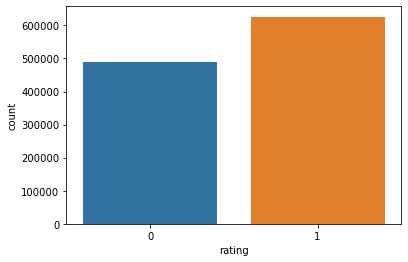

In [7]:
# checking the distribution of ratings (0,1) 

import seaborn as sns
sns.countplot(x='rating', data=rating_data)  

Most customers seem to be happier with their purchases than being disappointed

<AxesSubplot:xlabel='quiz_type', ylabel='count'>

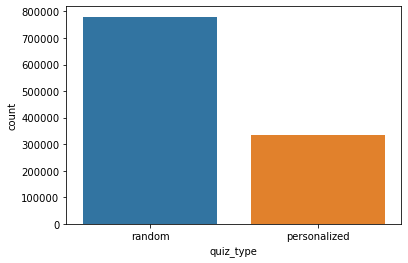

In [8]:
# checking the frequency of type of quiz

sns.countplot(x='quiz_type', data=rating_data) 

In [9]:
# encoding quiz_type (random and personalized) into 1 and 2 categories to check correlation between features 

encode_quiz_type = {"quiz_type": {"random": 1, "personalized": 2}}

In [10]:
rating_data = rating_data.replace(encode_quiz_type)
rating_data.head()

,user_id,quiz_type,quiz_number,question_number,item_id,rating
0,0,1,0,0,45,1
1,0,1,0,1,734,1
2,0,1,0,2,4145,1
3,0,1,0,3,3231,0
4,0,1,0,4,361,1


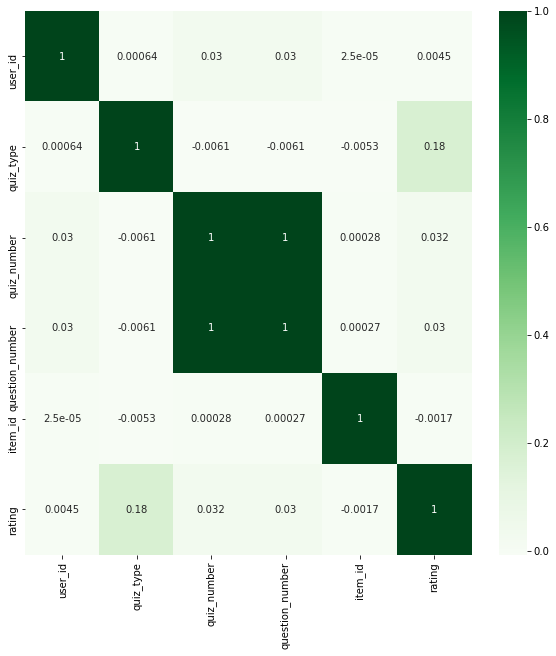

In [11]:
# plotting correlation matrix to check the correlation between features 

corr_matrix = rating_data.corr()
top_corr_features = corr_matrix.index
plt.figure(figsize=(10,10))

# plotting heatmap 
heat_map = sns.heatmap(rating_data[top_corr_features].corr(), annot=True, cmap="Greens")

Since quiz_number and question_number features are highly correlated with each other, it's better to remove them otherwise we'd run into multicollinearity conundrum. 

In [12]:
rating_data['user_id'].unique()

array([    0,     1,     2, ..., 19997, 19998, 19999], dtype=int64)

In [13]:
rating_data['question_number'].unique()

array([   0,    1,    2, ..., 1037, 1038, 1039], dtype=int64)

In [14]:
rating_data['quiz_number'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103],
      dtype=int64)

Users rate items in (multiple) quizzes of 10 questions each

In [15]:
len(np.unique(rating_data['user_id']))

20000

In [16]:
# finding top 10 users based on ratings 

most_rated_users = rating_data.groupby('user_id').size().sort_values(ascending=False)[:10]
most_rated_users

user_id
13613    1040
11786     700
15044     610
6273      580
11460     550
5745      540
18810     540
16398     520
10944     520
15867     520
dtype: int64

In [17]:
# checking user's (id:13613) purchases and ratings  

print(rating_data.loc[rating_data['user_id'].isin([13613])])

        user_id  quiz_type  quiz_number  question_number  item_id  rating
753040    13613          1            0                0     2276       1
753041    13613          1            0                1     1471       1
753042    13613          1            0                2     3446       0
753043    13613          1            0                3     1258       1
753044    13613          1            0                4      381       1
...         ...        ...          ...              ...      ...     ...
754075    13613          1          103             1035     1406       0
754076    13613          1          103             1036     4643       1
754077    13613          1          103             1037     1152       0
754078    13613          1          103             1038     1582       0
754079    13613          1          103             1039      352       0

[1040 rows x 6 columns]


***Building a Recommendation model using Surprise Python Library*** 

In [18]:
from surprise import Dataset
from surprise import accuracy
from surprise import Reader

In [19]:
# Reader class used to parse the file containing ratings  
# rating scale used for every rating. By default, it is (1,0)

# Reading in values as Surprise dataset
reader = Reader(rating_scale=(0, 1))

In [20]:
# creating dataframe with features that are useful for building recommendation system:- items, users, ratings

rating_data.drop(['quiz_number', 'question_number', 'quiz_type'], axis=1, inplace=True)

In [21]:
rating_data.head()

,user_id,item_id,rating
0,0,45,1
1,0,734,1
2,0,4145,1
3,0,3231,0
4,0,361,1


In [22]:
data = Dataset.load_from_df(rating_data,reader) 

In [23]:
# splitting the dataset into 80:20 ratio
from surprise.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.2, random_state=10)

In [24]:
dataset = data.build_full_trainset()
print('Number of users: ',dataset.n_users,'\n')
print('Number of items: ',dataset.n_items)

Number of users:  20000 

Number of items:  5000


In [25]:
# checking sparsity of the dataset 
20000*5000

100000000

In [26]:
1116370/100000000

0.0111637

### Memory based collaborative filtering (neighbourhood based filtering)

In [27]:
from surprise.prediction_algorithms import knns
from surprise.similarities import cosine, msd, pearson
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms import KNNBasic, KNNWithMeans, KNNBaseline

In [28]:
# KNNBasic (using Cosine similarity metric)
knn_basic_cos = knns.KNNBasic(sim_options = {'name':'cosine','user_based':False})
knn_basic_cos.fit(train_data)
predict_data = knn_basic_cos.test(test_data)
print(accuracy.rmse(predict_data))

Computing the cosine similarity matrix...


C:\Users\Payel\anaconda3\lib\site-packages\surprise\prediction_algorithms\algo_base.py:249: RuntimeWarning: invalid value encountered in double_scalars
  sim = construction_func[name](*args)


Done computing similarity matrix.
RMSE: 0.4859
0.48587930704382803


In [29]:
#KNNBasic (using Pearson similarity metric)
knn_basic_pearson = knns.KNNBasic(sim_options={'name':'pearson','user_based':False})
knn_basic_pearson.fit(train_data)
predict_data_pearson = knn_basic_pearson.test(test_data)
print(accuracy.rmse(predict_data_pearson))

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.5007
0.5006569777355337


In [30]:
#KNNwithMeans (using Cosine similarity as it outperformed Pearson)
knn_means = knns.KNNWithMeans(sim_options={'name':'cosine','user_based':False})
knn_means.fit(train_data)
knn_mean_prediction = knn_means.test(test_data)
print(accuracy.rmse(knn_mean_prediction))

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.4458
0.4458340199917402


In [31]:
#KNNBaseline (using Cosine similarity as it outperformed Pearson)
knn_baseline = knns.KNNBaseline(sim_options={'name':'cosine','user_based':False})
knn_baseline.fit(train_data)
knn_baseline_prediction = knn_baseline.test(test_data)
print(accuracy.rmse(knn_baseline_prediction))

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.4461
0.44609847385526336


**As observed from the above statistics, KNNwithMeans using Cosine Similarity is the BEST Memory-based Model** 

### Model-based Collaborative Filtering

In [32]:
from surprise.model_selection import GridSearchCV
from surprise.prediction_algorithms import SVD

In [33]:
# n_epochs : number of iteration of the SVD procedure (default: 20)
# n_factors : number of factors (default : 20)
# lr_all : learning rate of all parameters (default : 0.007)
# reg_all : regularization term of all parameters (default: 0.02)
# n_jobs : number of processors running parallely (n_jobs : -1 means all processors running)

In [34]:
#GridSearch on SVD to try out different parameters to find optimal ones
param_grid = {'n_factors':[20,50],'n_epochs': [5, 10], 'lr_all': [0.002, 0.005], 'reg_all': [0.4, 0.6]}
gs_model1 = GridSearchCV(SVD, param_grid=param_grid, n_jobs = -1, joblib_verbose=5)
gs_model1.fit(data)
gs_model1.best_params

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  5.6min finished


{'rmse': {'n_factors': 20, 'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4},
 'mae': {'n_factors': 20, 'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}}

In [35]:
gs_model1.best_score

{'rmse': 0.44351247163874274, 'mae': 0.4139396555372053}

In [36]:
#GridSearch on SVD with different n_factors and reg_all values 
param_grid = {'n_factors':[20,30],'n_epochs': [5, 10], 'lr_all': [0.002, 0.005], 'reg_all': [0.2, 0.6]}
gs_model2 = GridSearchCV(SVD,param_grid=param_grid,n_jobs = -1,joblib_verbose=5)
gs_model2.fit(data)
gs_model2.best_params

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  5.0min finished


{'rmse': {'n_factors': 20, 'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.2},
 'mae': {'n_factors': 20, 'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.2}}

In [37]:
gs_model2.best_score

{'rmse': 0.4406971870435881, 'mae': 0.4017279493855175}

In [38]:
#GridSearch on SVD with different n_factors and reg_all values 
param_grid = {'n_factors':[10,20],'n_epochs': [10, 20], 'lr_all': [0.002, 0.007], 'reg_all': [0.2, 0.4]}
gs_model3 = GridSearchCV(SVD,param_grid=param_grid,n_jobs = -1,joblib_verbose=5)
gs_model3.fit(data)
gs_model3.best_params

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  7.6min finished


{'rmse': {'n_factors': 10, 'n_epochs': 20, 'lr_all': 0.007, 'reg_all': 0.2},
 'mae': {'n_factors': 10, 'n_epochs': 20, 'lr_all': 0.007, 'reg_all': 0.2}}

In [39]:
gs_model3.best_score

{'rmse': 0.4398353533783193, 'mae': 0.3977634169618418}

From the above statistics, it seems that reg_all with value 0.2 and n_factors having lower values such as 10 are the best hyperparameters

In [40]:
# 1st SVD prediction on test data 
# n_factors : 20, reg_all : 0.4

svd = SVD(n_factors=20,n_epochs=10,lr_all=0.007,reg_all=0.4)
svd.fit(train_data)
svd_prediction1 = svd.test(test_data)
print(accuracy.rmse(svd_prediction1))

RMSE: 0.4432
0.4431838047291049


In [41]:
# 2nd SVD prediction on test data 
# n_factors : 10, reg_all : 0.2

svd = SVD(n_factors=10,n_epochs=10,lr_all=0.007,reg_all=0.2)
svd.fit(train_data)
svd_prediction2 = svd.test(test_data)
print(accuracy.rmse(svd_prediction2))

RMSE: 0.4403
0.4402572837407672


In [42]:
# 3rd SVD prediction on test data 
# n_factors : 20, reg_all: 0.2

svd = SVD(n_factors=20,n_epochs=10,lr_all=0.007,reg_all=0.2)
svd.fit(train_data)
prediction3 = svd.test(test_data)
print(accuracy.rmse(prediction3))

RMSE: 0.4403
0.44026148689004774


From the above statistics, we can observe that 2nd SVD with parameters such as n_factors = 10 and reg_all = 0.2 perform the best 

**Model-based Collaborative filtering model has the best performance with the best parameters**

In [43]:
svd_prediction2

[Prediction(uid=16379, iid=4607, r_ui=1.0, est=0.8847156118429663, details={'was_impossible': False}),
 Prediction(uid=11736, iid=1903, r_ui=0.0, est=0.5017210683167674, details={'was_impossible': False}),
 Prediction(uid=7130, iid=415, r_ui=0.0, est=0.4982254884306802, details={'was_impossible': False}),
 Prediction(uid=1660, iid=4950, r_ui=1.0, est=0.5477205355696785, details={'was_impossible': False}),
 Prediction(uid=17458, iid=1803, r_ui=0.0, est=0.7003975938138152, details={'was_impossible': False}),
 Prediction(uid=2927, iid=249, r_ui=0.0, est=0.14481086342721763, details={'was_impossible': False}),
 Prediction(uid=3754, iid=1573, r_ui=1.0, est=0.27141305147239797, details={'was_impossible': False}),
 Prediction(uid=5982, iid=3231, r_ui=0.0, est=0, details={'was_impossible': False}),
 Prediction(uid=14038, iid=3147, r_ui=1.0, est=0.6980582976742461, details={'was_impossible': False}),
 Prediction(uid=15209, iid=1642, r_ui=1.0, est=0.8573688956469839, details={'was_impossible': F

In [44]:
# checking the prediction model 
# user_id : 13613
user_13613_prediction = svd.predict(13613,3446)
user_13613_prediction


Prediction(uid=13613, iid=3446, r_ui=None, est=0.43729408897705213, details={'was_impossible': False})

In [45]:
user_13613_prediction1 = svd.predict(13613,2640)
user_13613_prediction1

Prediction(uid=13613, iid=2640, r_ui=None, est=0.5141656715642827, details={'was_impossible': False})

From the above analysis, we can say that user(id:13613) may prefer item (id:2640) more than item (id: 3446),
hence the system will recommend item (id:2640) to user (id: 13613)